In [1]:
import torch

print(torch.cuda.get_device_name(0))

NVIDIA GeForce RTX 4060 Laptop GPU


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from torchvision.io import read_image
from src.bounding_box import BBoxModel

In [4]:
MODEL_PATH = "./models/bbox_net_trained.pth"

image_dir = './data/color'

model = BBoxModel(MODEL_PATH)

print(f"Using device: {model.device}")

Using device: cuda


In [20]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

inference time: 0.0148 seconds
inference time: 67.3443 Hz
(519, 258)


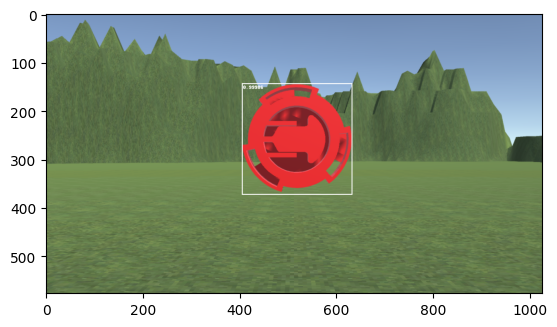

In [24]:
import time
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_pil_image

# load a test image
img = read_image('./data/test_img.png')

# send image to gpu and make prediction
tic = time.perf_counter()
bbox, score = model.find_bbox(img)
toc = time.perf_counter()
print(f'inference time: {(toc-tic):0.4f} seconds')
print(f'inference time: {1/(toc-tic):0.4f} Hz')

# print depth at bounding box center
bbox_center = (int((bbox[2] + bbox[0])/2), int((bbox[3] + bbox[1])/2))
print(bbox_center)

# prepare data for draw function
boxes = torch.unsqueeze(bbox, 0)
scores = [f'{float(score):.5f}']

# draw bounding box on image and display
box = draw_bounding_boxes(img, boxes=boxes,
                          labels=scores,
                          colors="white",
                          width=2)
imshow(box)
im = to_pil_image(box.detach())
im.save('./data/test_image_result.png', 'PNG')